#E-Commerce Customer Behavior

Your Project Manager asked you to analyze the Customer Behavior Dataset to understand more about the profiles that has a larger Total Spend. He suspects the product is not evenly distributed between Male and Female users.

This dataset is from Kaggle, and this is the link: https://www.kaggle.com/code/uom190346a/customer-behavior-analysis/input

# Library Importation

In [24]:
# Import relevant libraries

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assigning to a variable

df = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')

# Data Exploration

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, involving the examination and visualization of data to understand its main characteristics.

In [25]:
# Displaying the first few rows of the dataset
print(df.head())

# Getting basic statistics of the dataset
print(df.describe())

# Checking data types and missing values
print(df.info())

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

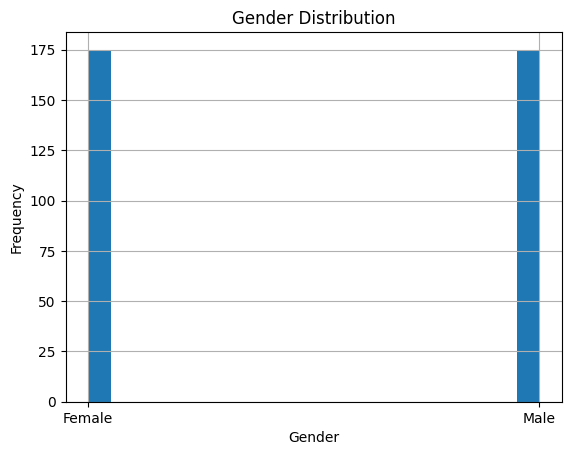

In [26]:
#Checking Gender Distribution

df['Gender'].hist(bins=20)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

The frequency distribution for each gender is the same. Now lets checkout the Total Spend By Gender.

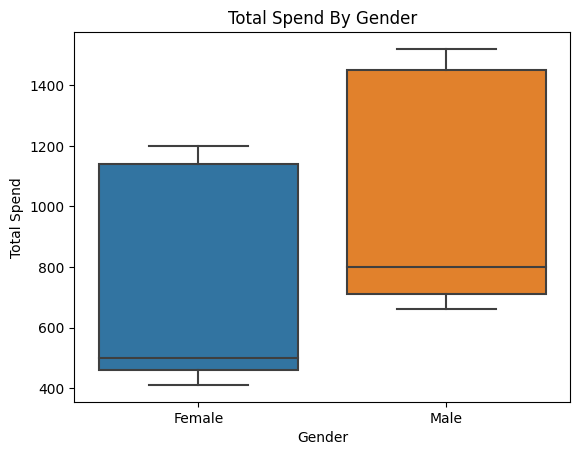

In [27]:
sns.boxplot(x='Gender', y='Total Spend', data=df)
plt.title('Total Spend By Gender')
plt.show()

**It seems that Male Users spend more on the Business. But, we should do a ``Hypothesis Test`` to make sure this difference is ``statistically significant``.**

# Hypothesis Testing

**Hypotheses:**

$H_0$: There is no difference in average number of Total Spend between users who are Male and Users who are Female.

$H_A$: There is a difference in average number of Total Spend between users who are Male and Users who are Female.

**In order to perform this analysis, you must turn each label into an integer so you can create a ``mapped column``**

In [28]:
# 1. Create `map_dictionary`
map_dictionary = {'Female': 2, 'Male': 1}

# 2. Create new `device_type` column
df['Gender_Int'] = df['Gender']

# 3. Map the new column to the dictionary
df['Gender_Int'] = df['Gender'].map(map_dictionary)

df['Gender_Int'].head()

0    2
1    1
2    2
3    1
4    1
Name: Gender_Int, dtype: int64

**Observation:** Although we could test the hypothesis with the columns having a space, lets change it and replace it with underscores. It is a ``good practice``.

In [29]:
df.columns = df.columns.str.replace(' ', '_')

In [30]:
# 1. Isolate the `Total_Spend` column for Male users.
Male = df[df['Gender_Int'] == 1]['Total_Spend']

# 2. Isolate the `Total_Spend` column for Female users.
Female = df[df['Gender_Int'] == 2]['Total_Spend']

In [31]:
# 3. Perform the t-test
stats.ttest_ind(a=Male, b=Female, equal_var=False)

TtestResult(statistic=7.937523297869168, pvalue=2.874754863403367e-14, df=347.45581810689544)

* **P_Value = 2.874754863403367e-14 (A pretty small number)**
---
Since the p-value is smaller than the chosen significance level (5%), you reject the null hypothesis. You conclude that there is a statistically significant difference in the average number of ``Total Spend`` between users who are Male and Users who are Female.

# Insights

Our exploration told us that there is a difference between Male and Female Total Spend on the E-Commerce.

One potential next step is to explore what other factors influence the variation in the Total Spend, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the E-Commerce app may provide more data to investigate the Revenue.